In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
#plt.style.use('fivethirtyeight')

In [3]:
rcParams['figure.figsize'] = 15, 5

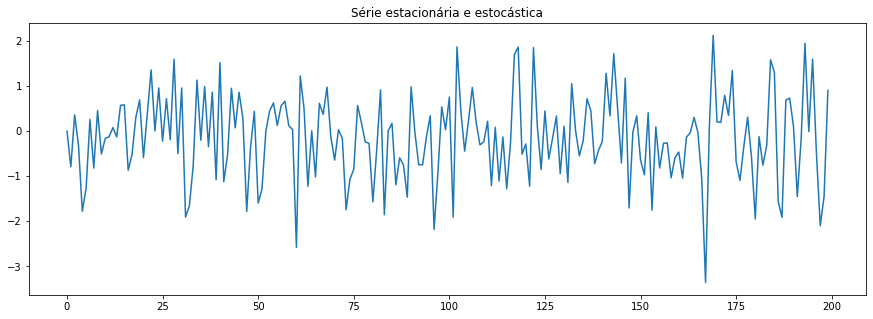

In [4]:
def generate_stationary_stoch(range_0, range_1):
    cst = 0
    l = []
    for t in range(range_0, range_1):
        random = np.random.randn()
        if l:
            y = random
        else:
            y = cst
        l.append(y)
    return l

plt.figure()

series = generate_stationary_stoch(0, 200)
plt.plot(series)

plt.title("Série estacionária e estocástica")

#plt.show()
plt.savefig("serie_estacionaria.jpeg")

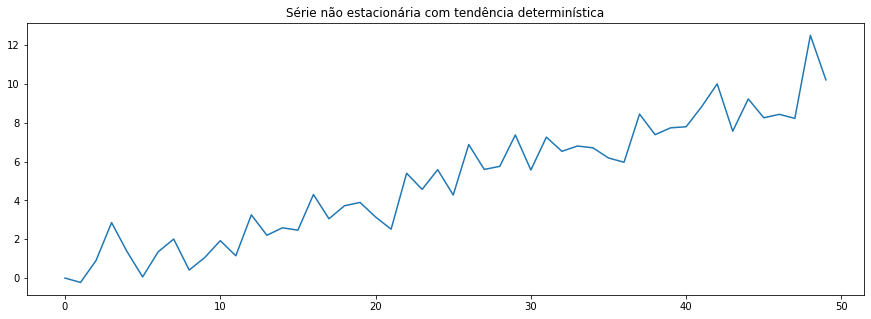

In [5]:
def generate_nonstationary_det_trend(range_0, range_1):
    cst = 0
    delta = 0.2
    l = []
    for t in range(range_0, range_1):
        random = np.random.randn()
        if l:
            y = cst + (delta*t) + random
        else:
            y = cst
        l.append(y)
    return l

plt.figure()

series = generate_nonstationary_det_trend(0, 50)
plt.plot(series)

plt.title("Série não estacionária com tendência determinística")

plt.show()

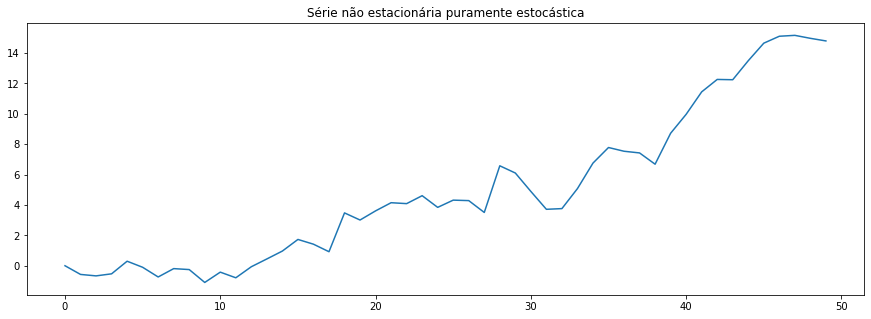

In [6]:
def generate_nonstationary_pure_stoch(range_0, range_1):
    cst = 0
    l = []
    for t in range(range_0, range_1):
        random = np.random.randn()
        if l:
            y = l[-1] + random
        else:
            y = cst
        l.append(y)
    return l
plt.figure()

series = generate_nonstationary_pure_stoch(0, 50)
plt.plot(series)

plt.title("Série não estacionária puramente estocástica")

plt.show()

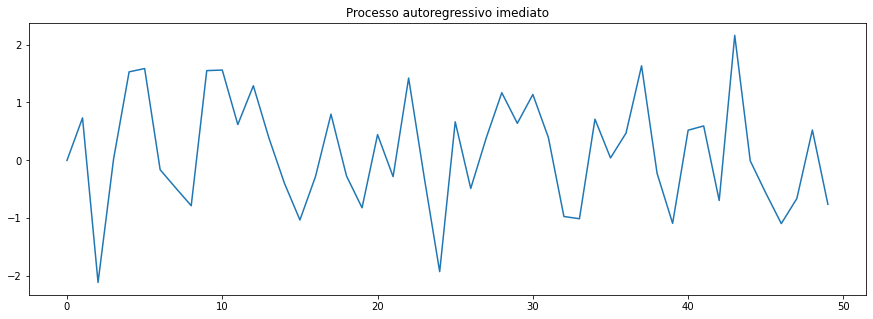

In [7]:
def generate_immediate_ar(range_0, range_1):
    phi = 0.25
    l = []
    for t in range(range_0, range_1):
        random = np.random.randn()
        if l:
            y = (phi*l[-1]) + random
        else:
            y = 0
        l.append(y)
    return l
plt.figure()

series = generate_immediate_ar(0, 50)
plt.plot(series)

plt.title("Processo autoregressivo imediato")

plt.show()

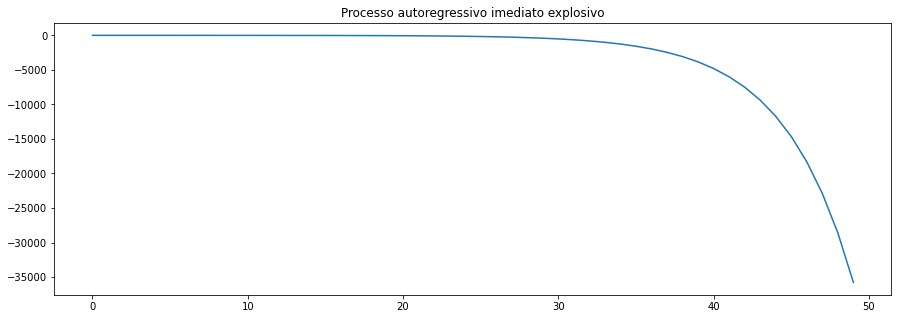

In [8]:
def generate_phi(range_0, range_1):
    phi = 1.25
    l = []
    for t in range(range_0, range_1):
        random = np.random.randn()
        if l:
            y = (phi*l[-1]) + random
        else:
            y = 0
        l.append(y)
    return l
plt.figure()

series = generate_phi(0, 50)
plt.plot(series)

plt.title("Processo autoregressivo imediato explosivo")

plt.show()

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

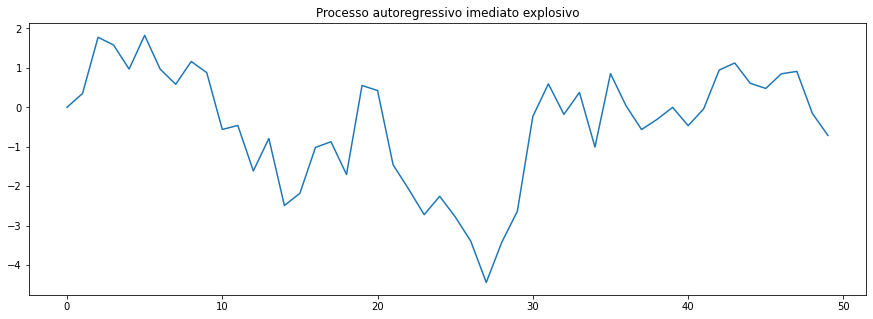

In [11]:
def generate_phi(range_0, range_1):
    phi = 0.8
    l = []
    for t in range(range_0, range_1):
        random = np.random.randn()
        if l:
            y = (phi*l[-1]) + random
        else:
            y = 0
        l.append(y)
    return l
plt.figure()

series = generate_phi(0, 50)
plt.plot(series)

plt.title("Processo autoregressivo imediato explosivo")

plt.show()

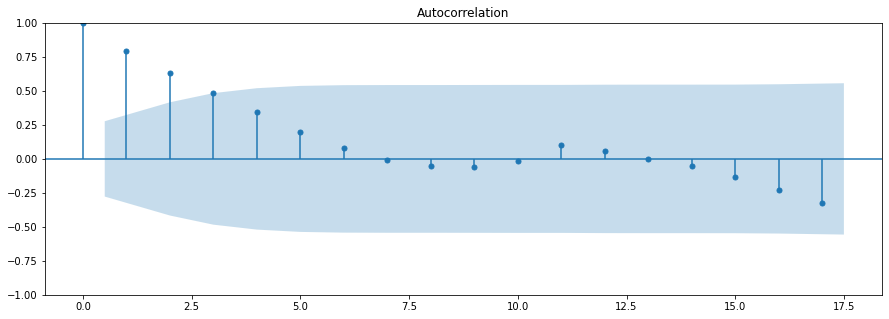

In [12]:
plot_acf(pd.Series(series))
plt.show()

c:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


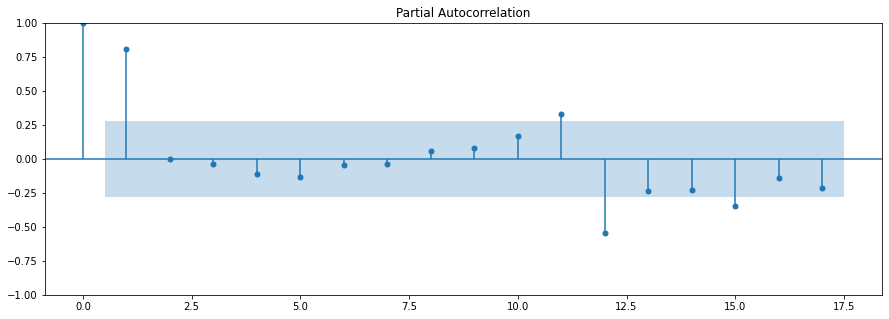

In [13]:
plot_pacf(pd.Series(series))
plt.show()

In [14]:
from statsmodels.tsa.arima_process import ArmaProcess


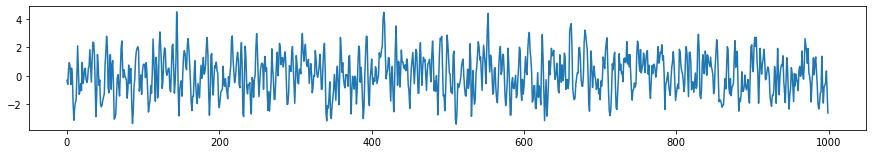

In [15]:
plt.subplot(2, 1, 1)
ar1 = np.array([1])
ma1 = np.array([1, 0.9, 0.3])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

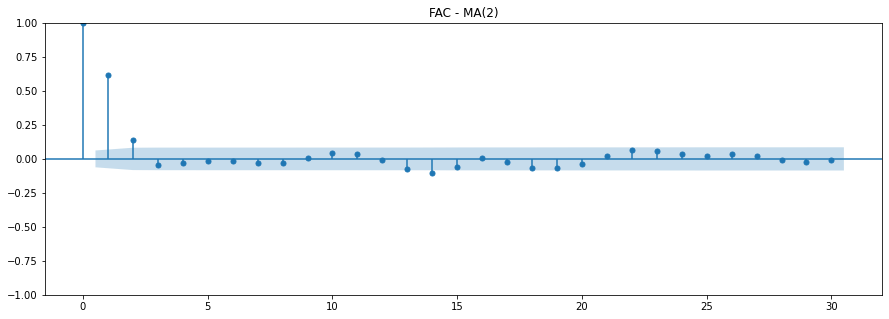

In [16]:
plot_acf(simulated_data_1)

plt.title("FAC - MA(2)")

plt.savefig("exemplo_fac_ma2.jpeg")

c:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


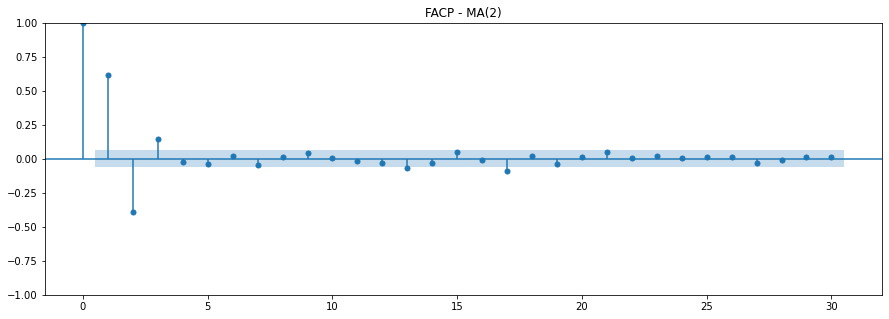

In [17]:
plot_pacf(simulated_data_1)

plt.title("FACP - MA(2)")

plt.savefig("exemplo_facp_ma2.jpeg")

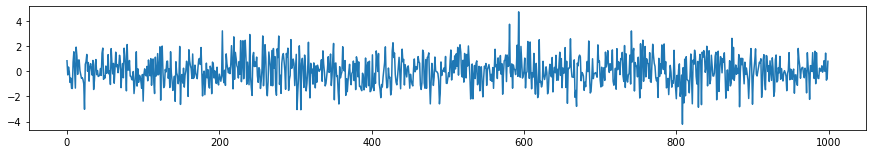

In [36]:
def seasonal_order(freq, coef) -> list:
    order = [0 for x in range(0,freq-1)]
    order.insert(0,1)
    order.append(coef)
    return order

plt.subplot(2, 1, 1)
ar1 = np.array([1])
ma1 = np.array(seasonal_order(12,0.6))
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

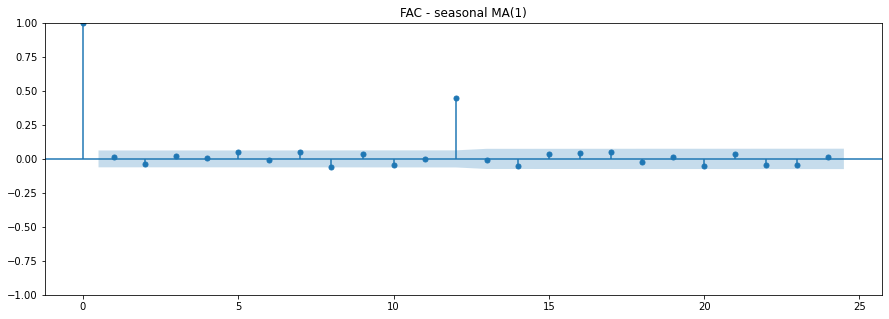

In [46]:
plot_acf(simulated_data_1, lags = 24)

plt.title("FAC - seasonal MA(1)")

#plt.show()
plt.savefig("exemplo_fac_seasonal_ma1.jpeg")

c:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


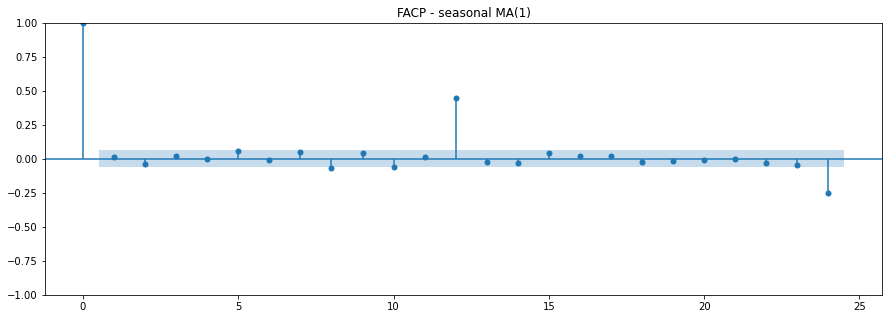

In [47]:
plot_pacf(simulated_data_1, lags = 24)

plt.title("FACP - seasonal MA(1)")

#plt.show()
plt.savefig("exemplo_facp_seasonal_ma1.jpeg")